/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks


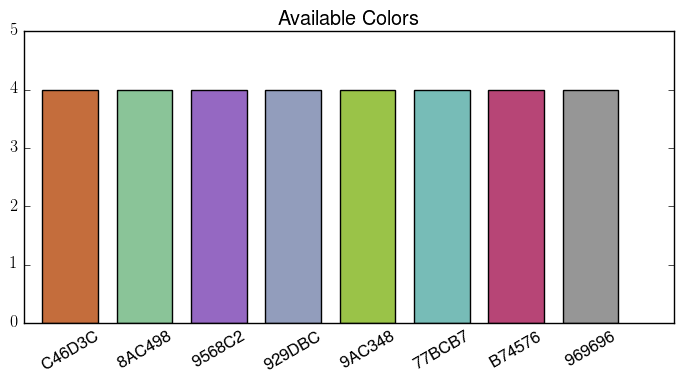

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib
import pylab
from os import listdir
from os.path import isfile, join
from collections import OrderedDict
import re
import codecs

base = '/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks'
%cd $base 
matplotlib.rc('font', size=12, weight='normal')
matplotlib.rc('legend', fontsize=10)
matplotlib.rc('xtick', direction='in')
matplotlib.rc('xtick.major', size=4)
rot = 50
#JASON_colors = ['#3377bb', '#33bb77', '#bb7733', '#bb3377']
colors = ['#C46D3C', '#8AC498', '#9568C2', '#929DBC', '#9AC348', '#77BCB7',  '#B74576', '#969696']
#colors = ['#1C1F24', '#444C54', '#CBDCEF', '#A1B1C1']
#colors = ['#f7f7f7', '#cccccc', '#969696',  '#252525']
# reference - magenta, green,   gray/blue,  blue,     orange,      purple,   green                
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_size('small')
#Image size
pylab.rcParams['figure.figsize'] = 16, 12 

e = .2
w = .6
gap = .2
labelHeight =.09
plt.figure(figsize=(7,4))
for i in range(len(colors)):
    plt.bar(e, 4, width=w, color=colors[i])
    e += w
    e += gap
e += w+gap
plt.xticks(np.arange(len(colors))*(w+gap)+gap+(w)/2, colors, rotation=30)
plt.title('Available Colors')
plt.ylim(0, 5)
plt.tight_layout()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') 
#title('Ratio of persistent accesses to total accesses ')

In [37]:
from os import listdir
from os.path import isfile, join
import re
import pprint
import operator

print "DTLB-sim results for graphmat workloads"

dir = '/nobackup/swapnilh/pin-tools/logs-pre-ASPLOS'
%cd $dir

workloads_list = ["PageRank", "BFS", "SSSP"]
database_list = ["flickr", "ljournal", "wikipedia"]
assoc_list = ["FA", "SA"]
tlb_size_list = ["16", "32", "64"]
results = []

for filename in listdir(dir):
    if filename.startswith("dtlb-") or filename.endswith(".log"): 
        curr_workload = ""
        curr_database = ""
        curr_assoc = ""
        curr_tlb_size = 0
        curr_num_access = 0
        curr_num_misses = 0
        curr_l1_mpki = 0.0
        curr_hit_rate = 0.0
        for workload in workloads_list:
            if workload in filename:
                curr_workload = workload
                break
        for database in database_list:
            if database in filename:
                curr_database = database
                break
        for assoc in assoc_list:
            if assoc in filename:
                curr_assoc = assoc
                break
        for size in tlb_size_list:
            if size in filename:
                curr_tlb_size = int(size)
                break
                
        with open(filename) as g:
            content = g.readlines()
        
        for line in content:
            if "Access count according to the TLBs" in line:
                words = line.split(" ")
                curr_num_access = int(words[6])
            if "hitrate" in line:
                words = line.split(" ")
                curr_hit_rate = float(words[8])
            if "DTLB miss" in line:
                words = line.split(" ")
                curr_num_misses = int(words[4])
            if "MKPI" in line:
                words = re.split(" |__", line)
                curr_l1_mpki = float(words[4])
        curr_dict = {"workload": curr_workload, "database": curr_database,\
                    "assoc": curr_assoc, "tlb_size": curr_tlb_size,\
                    "num_accesses": curr_num_access, "hit_rate": curr_hit_rate,\
                    "dtlb_misses": curr_num_misses, "l1_mpki": curr_l1_mpki}
        results.append(curr_dict)
    else:
        continue

#results = sorted(results, key = operator.itemgetter("assoc", "tlb_size", "workload", "database"))        
results = sorted(results, key = operator.itemgetter("workload", "database", "assoc", "tlb_size"))        
for run in results:
    print run["workload"], run["database"], run["assoc"],  run["tlb_size"], run["hit_rate"]

DTLB-sim results for graphmat workloads
/nobackup/swapnilh/pin-tools/logs-pre-ASPLOS
BFS flickr FA 16 0.988478
BFS flickr FA 32 0.995724
BFS flickr FA 64 0.995723
BFS flickr SA 16 0.969215
BFS flickr SA 32 0.985099
BFS flickr SA 64 0.997485
BFS ljournal FA 16 0.992348
BFS ljournal FA 32 0.99601
BFS ljournal FA 64 0.995937
BFS ljournal SA 16 0.979615
BFS ljournal SA 32 0.991599
BFS ljournal SA 64 0.995826
BFS wikipedia FA 16 0.998083
BFS wikipedia FA 32 0.998814
BFS wikipedia FA 64 0.998814
BFS wikipedia SA 16 0.995376
BFS wikipedia SA 32 0.998251
BFS wikipedia SA 64 0.998839
PageRank flickr FA 16 0.989323
PageRank flickr FA 32 0.997615
PageRank flickr FA 64 0.997787
PageRank flickr SA 16 0.335916
PageRank flickr SA 32 0.991577
PageRank flickr SA 64 0.999133
PageRank ljournal FA 16 0.983682
PageRank ljournal FA 32 0.992413
PageRank ljournal FA 64 0.992241
PageRank ljournal SA 16 0.708217
PageRank ljournal SA 32 0.394073
PageRank ljournal SA 64 0.975283
PageRank wikipedia FA 16 0.970709


Results for GraphMat
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks


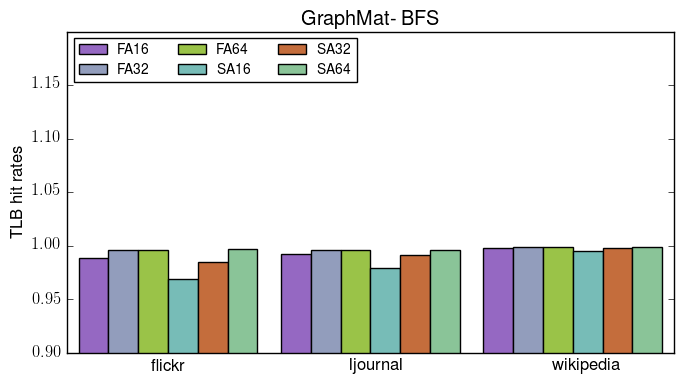

In [74]:
from collections import OrderedDict

print "Results for GraphMat"

results_plot = [x for x in results if x['workload'] == 'BFS']

e0 = .2
e = e0
w = .5
tw = .1
gap = .4
lim = 1.2
labelHeight =.09
colorGraph = [colors[2], colors[3], colors[4], colors[5], colors[0], colors[1]]
plt.figure(figsize=(7,4))
j = 0
for i in range(len(results_plot)):
    if (j > len(assoc_list) + len(tlb_size_list)):
        e += gap
        j = 0 
    plt.bar(e, results_plot[i]['hit_rate'], width=w, label=results_plot[i]['assoc']\
            +str(results_plot[i]['tlb_size']), color=colorGraph[j])
    e += w
    j += 1

e += e0
plt.xticks(np.arange(len(database_list))*(w+gap)*(6*w+gap+w)+e0 +3*w, database_list, rotation=0)
plt.title('GraphMat- BFS')
plt.ylim(0.9, lim)
plt.xlim(0, e)
plt.ylabel('TLB hit rates')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=3, fontsize=10)
plt.tight_layout()
%cd $base 


Results for GraphMat
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks


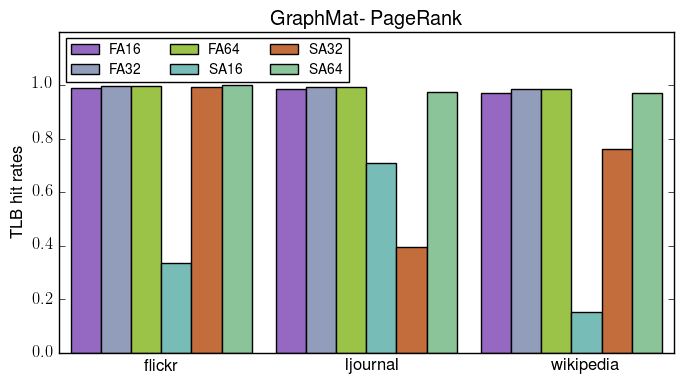

In [70]:
from collections import OrderedDict

print "Results for GraphMat"

results_plot = [x for x in results if x['workload'] == 'PageRank']

e0 = .2
e = e0
w = .5
tw = .1
gap = .4
lim = 1.2
labelHeight =.09
colorGraph = [colors[2], colors[3], colors[4], colors[5], colors[0], colors[1]]
plt.figure(figsize=(7,4))
j = 0
for i in range(len(results_plot)):
    if (j > len(assoc_list) + len(tlb_size_list)):
        e += gap
        j = 0 
    plt.bar(e, results_plot[i]['hit_rate'], width=w, label=results_plot[i]['assoc']\
            +str(results_plot[i]['tlb_size']), color=colorGraph[j])
    e += w
    j += 1

e += e0
plt.xticks(np.arange(len(database_list))*(w+gap)*(6*w+gap+w)+e0 +3*w, database_list, rotation=0)
plt.title('GraphMat- PageRank')
plt.ylim(0, lim)
plt.xlim(0, e)
plt.ylabel('TLB hit rates')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=3, fontsize=10)
plt.tight_layout()
%cd $base 


Results for GraphMat
/afs/cs.wisc.edu/u/s/w/swapnilh/private/2017_FOMA/microbenchmarks


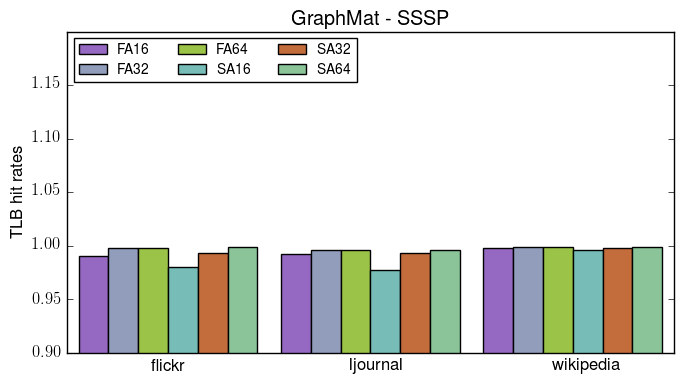

In [73]:
from collections import OrderedDict

print "Results for GraphMat"

results_plot = [x for x in results if x['workload'] == 'SSSP']

e0 = .2
e = e0
w = .5
tw = .1
gap = .4
lim = 1.2
labelHeight =.09
colorGraph = [colors[2], colors[3], colors[4], colors[5], colors[0], colors[1]]
plt.figure(figsize=(7,4))
j = 0
for i in range(len(results_plot)):
    if (j > len(assoc_list) + len(tlb_size_list)):
        e += gap
        j = 0 
    plt.bar(e, results_plot[i]['hit_rate'], width=w, label=results_plot[i]['assoc']\
            +str(results_plot[i]['tlb_size']), color=colorGraph[j])
    e += w
    j += 1

e += e0
plt.xticks(np.arange(len(database_list))*(w+gap)*(6*w+gap+w)+e0 +3*w, database_list, rotation=0)
plt.title('GraphMat - SSSP')
plt.ylim(0.9, lim)
plt.xlim(0, e)
plt.ylabel('TLB hit rates')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') 
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left", ncol=3, fontsize=10)
plt.tight_layout()
%cd $base 
